In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Acquire MNIST data
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape data
import numpy as np

train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

2023-07-20 23:29:54.241269: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
test_labels.shape

(10000,)

https://towardsdatascience.com/how-autoencoders-outperform-pca-in-dimensionality-reduction-1ae44c68b42f

In [2]:
# Set data type
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)

In [3]:
import os

In [4]:
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(train_images)
compressed_images = pca.transform(test_images)
recovered_images = pca.inverse_transform(compressed_images)

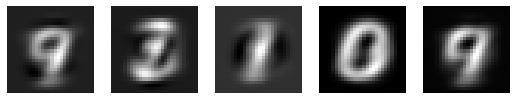

In [7]:
# Visualize compressed MNIST digits after PCA
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(recovered_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

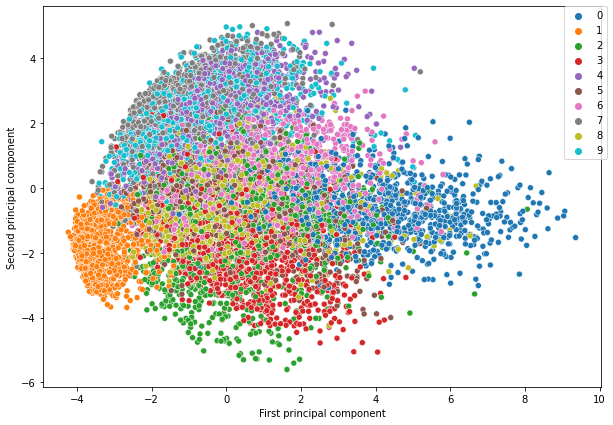

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.scatterplot(x=compressed_images[:,0],
                y=compressed_images[:,1],
                hue=test_labels, palette='tab10')

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [10]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

input_dim = 28*28
latent_vec_dim = 2

input_layer = Input(shape=(input_dim,))

# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(500, activation='sigmoid')(input_layer)
enc_layer_2 = Dense(300, activation='sigmoid')(enc_layer_1)
enc_layer_3 = Dense(100, activation='sigmoid')(enc_layer_2)
enc_layer_4 = Dense(latent_vec_dim, activation='tanh')(enc_layer_3)
encoder = enc_layer_4

# Then build the decoder
dec_layer_1 = Dense(100, activation='sigmoid')(encoder)
dec_layer_2 = Dense(300, activation='sigmoid')(dec_layer_1)
dec_layer_3 = Dense(500, activation='sigmoid')(dec_layer_2)
dec_layer_4 = Dense(input_dim, activation='sigmoid')(dec_layer_3)
decoder = dec_layer_4

# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder, name="Deep_Autoencoder")

# Latent representation (Optional)
latent_model = Model(input_layer, encoder)

# Get summary
autoencoder.summary()

Model: "Deep_Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_5 (Dense)              (None, 300)          

2023-07-20 00:38:08.914606: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-20 00:38:08.915436: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-20 00:38:08.955704: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:53:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-07-20 00:38:08.955743: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-20 00:38:08.957047: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-20 00:38:08.957134: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.

In [14]:
train_images.shape

(60000, 784)

2023-07-20 00:38:18.114991: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-20 00:38:18.136108: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3200000000 Hz


Epoch 1/70


2023-07-20 00:38:18.502955: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


469/469 [==============================] - 2s 4ms/step - loss: 0.2866 - val_loss: 0.2635
Epoch 2/70
469/469 [==============================] - 2s 3ms/step - loss: 0.2570 - val_loss: 0.2366
Epoch 3/70
469/469 [==============================] - 1s 3ms/step - loss: 0.2358 - val_loss: 0.2290
Epoch 4/70
469/469 [==============================] - 1s 3ms/step - loss: 0.2270 - val_loss: 0.2189
Epoch 5/70
469/469 [==============================] - 1s 3ms/step - loss: 0.2187 - val_loss: 0.2128
Epoch 6/70
469/469 [==============================] - 2s 3ms/step - loss: 0.2138 - val_loss: 0.2085
Epoch 7/70
469/469 [==============================] - 2s 3ms/step - loss: 0.2074 - val_loss: 0.2004
Epoch 8/70
469/469 [==============================] - 1s 3ms/step - loss: 0.2004 - val_loss: 0.1965
Epoch 9/70
469/469 [==============================] - 1s 3ms/step - loss: 0.1953 - val_loss: 0.1932
Epoch 10/70
469/469 [==============================] - 1s 3ms/step - loss: 0.1919 - val_loss: 0.1896
Epoch 11/7

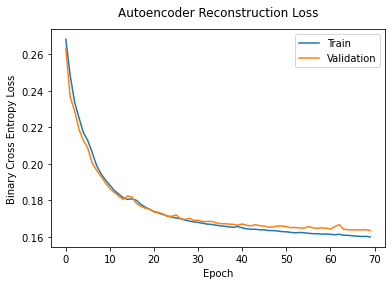

In [11]:
# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history = autoencoder.fit(train_images, train_images, epochs=70, batch_size=128,
                          shuffle=True, validation_data=(test_images, test_images))

# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

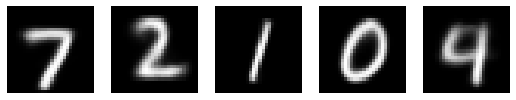

In [12]:
compressed_images = autoencoder.predict(test_images)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(compressed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

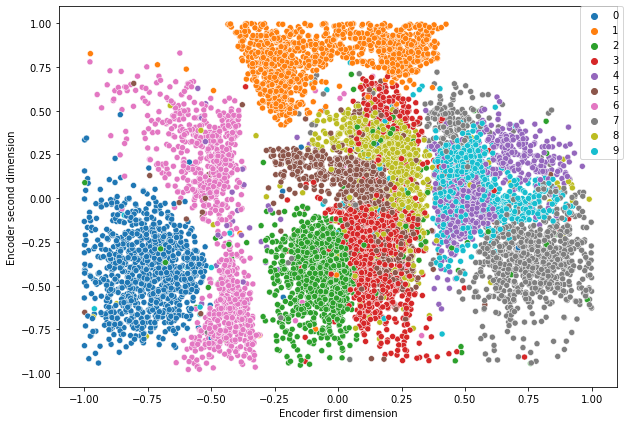

In [13]:
latent_representation = latent_model.predict(test_images)



plt.figure(figsize=(10, 7))

sns.scatterplot(x=latent_representation[:,0],
                y=latent_representation[:,1],
                hue=test_labels, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)